https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


> age : idade

> sex : sexo

> cp : tipo de dor no peito Valor 1: angina típica Valor 2: angina atípica Valor 3: dor não anginosa Valor 4: assintomático

> trtbps: pressão arterial em repouso (em mm Hg)

> chol : colestoral em mg/dl obtido através do sensor de IMC

> fbs : (glicemia em jejum > 120 mg/dl) (1 = verdadeiro; 0 = falso)

> rest_ecg : resultados eletrocardiográficos em repouso Valor 0: normal Valor 1: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV) Valor 2: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes

> talach : frequência cardíaca máxima alcançada angina induzida por exercício

> exang: angina induzida pelo exercício (1 = sim; 0 = não)
 
> oldpeak : depressão do ST induzida pelo exercício em relação ao repouso a inclinação do pico do segmento ST do exercício

> caa : número de vasos principais (0-3) coloridos por fluoroscopia

> thal : Thal rate

> output: 0 = menos chance de ataque cardíaco 1 = mais chance de ataque cardíaco 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")

In [ ]:
dados.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
dados= pd.read_csv('heart.csv', delimiter=",")

In [ ]:
dados.shape

(303, 14)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


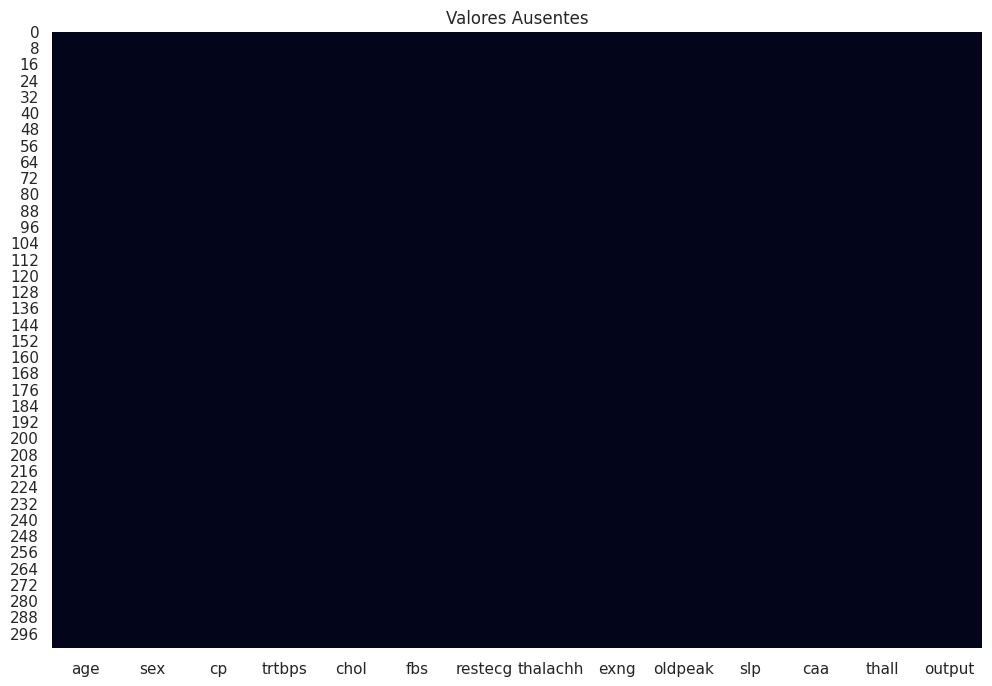

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dados.isna(),cbar=False)
plt.title('Valores Ausentes');

In [ ]:
display(dados.describe().round(2))

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [ ]:
dados.caa.unique()

array([0, 2, 1, 3, 4])

In [ ]:
dados.oldpeak.max()

6.2

In [ ]:
dados.output.value_counts()

1    165
0    138
Name: output, dtype: int64

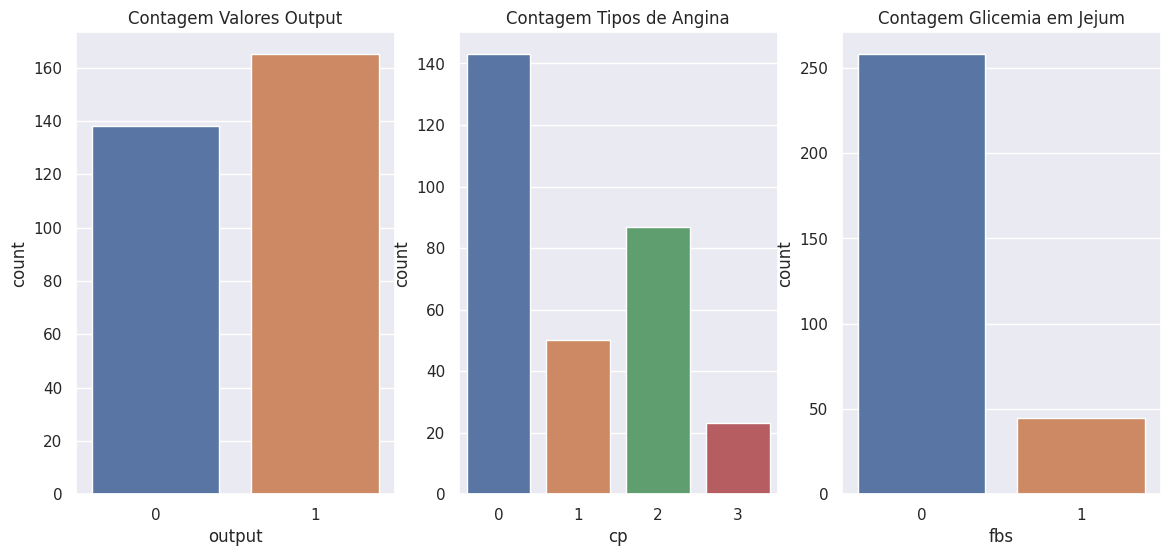

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
plt.title("Contagem Valores Output")
sns.countplot(x=dados.output);

plt.subplot(1,3,2)
plt.title("Contagem Tipos de Angina")
sns.countplot(x='cp',data=dados);

plt.subplot(1,3,3)
plt.title("Contagem Glicemia em Jejum")
sns.countplot(x='fbs',data=dados);

# Analytics

In [ ]:
#Colesterol Médio Por Sexo
#dados.groupby(by="sex")['chol'].mean()    mesma coisa
dados.groupby(by="sex").mean()['chol']

sex
0    261.302083
1    239.289855
Name: chol, dtype: float64

In [ ]:
dados[dados['output']==1].age.mean()


52.4969696969697

In [ ]:
dados[dados['output']==0].age.mean()

56.60144927536232

In [ ]:
#Idade Média Por Sexo
dados.groupby(by="sex").mean()['age']

sex
0    55.677083
1    53.758454
Name: age, dtype: float64

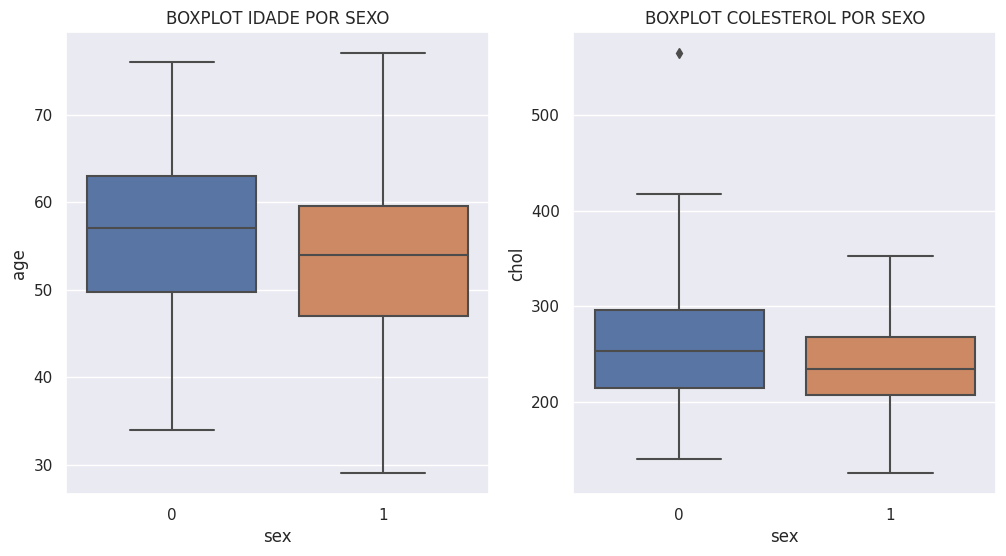

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("BOXPLOT IDADE POR SEXO")
sns.boxplot(data=dados,x="sex",y="age")
plt.subplot(1,2,2)
plt.title("BOXPLOT COLESTEROL POR SEXO")
sns.boxplot(data=dados, x='sex', y='chol');

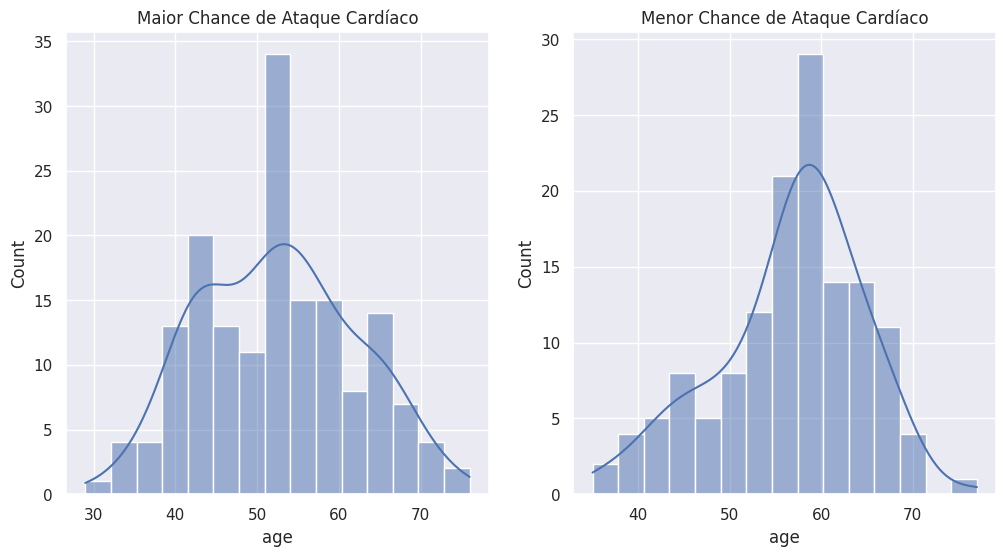

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Idade: Maior Chance de Ataque Cardíaco")
sns.histplot(data=dados[dados['output']==1], x='age',kde = True, bins=15)

plt.subplot(1,2,2)
plt.title("Idade: Menor Chance de Ataque Cardíaco")
sns.histplot(data=dados[dados['output']==0], x='age',kde = True, bins=15);


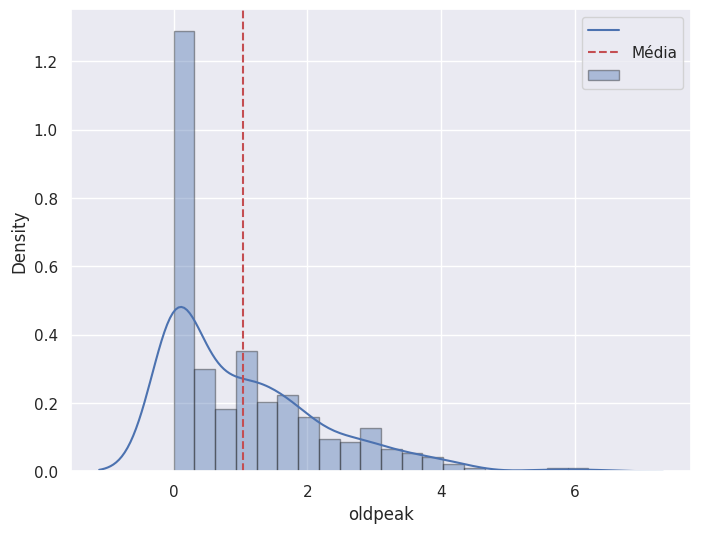

In [ ]:
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(dados["oldpeak"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20, ax = y)
y.axvline(dados["oldpeak"].mean(), color = "r", ls = "--")
plt.legend(["","Média",""]) ;

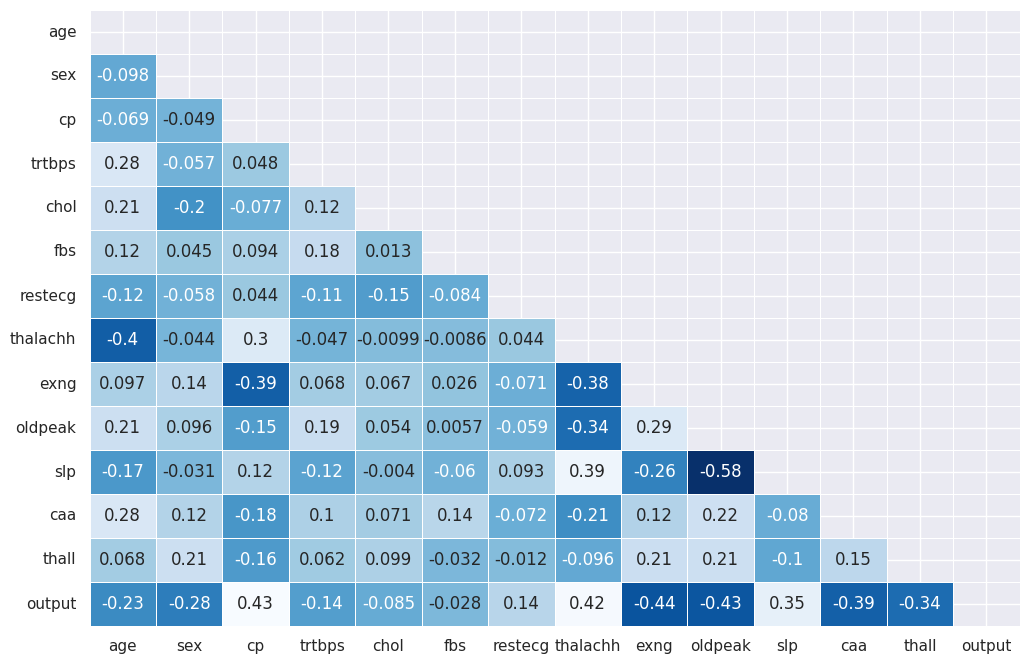

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dados.corr(),  cbar=False, mask=np.triu(dados.corr()), annot=True,linewidth=0.7, linecolor='white', cmap = 'Blues_r');

## Colesterol

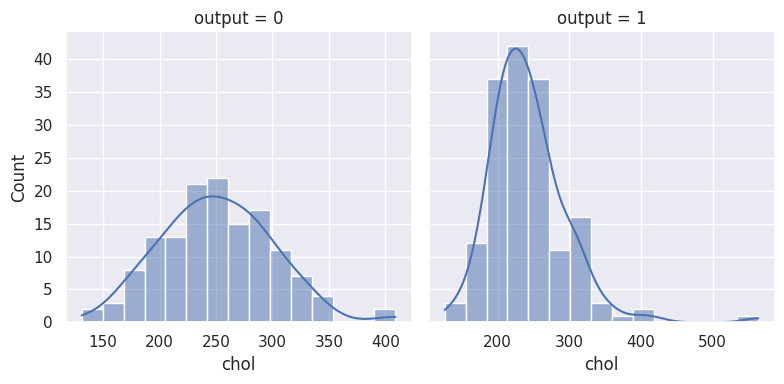

In [ ]:
g = sns.FacetGrid(dados, col='output', sharex=False ,height=4)
g.map(sns.histplot,"chol", kde=True, bins=15);

In [ ]:
dados[dados['output']==1].chol.describe()

count    165.000000
mean     242.230303
std       53.552872
min      126.000000
25%      208.000000
50%      234.000000
75%      267.000000
max      564.000000
Name: chol, dtype: float64

In [ ]:
dados[dados['output']==0].chol.describe()

count    138.000000
mean     251.086957
std       49.454614
min      131.000000
25%      217.250000
50%      249.000000
75%      283.000000
max      409.000000
Name: chol, dtype: float64

Analisando o colesterol é possivel perceber que aparentemente não existe uma relação direta com problemas cardiacos

## Pressão Arterial em Repouso

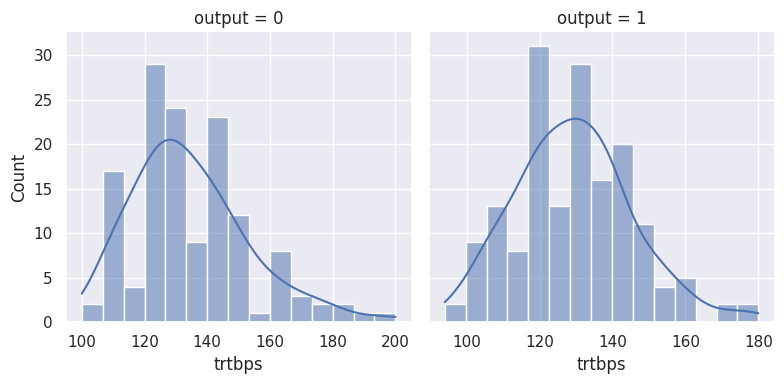

In [ ]:
# Mesmo gráfico do de baixo só que de forma diferente
g = sns.FacetGrid(dados, col='output', sharex=False ,height=4)
g.map(sns.histplot,"trtbps", kde=True, bins=15);

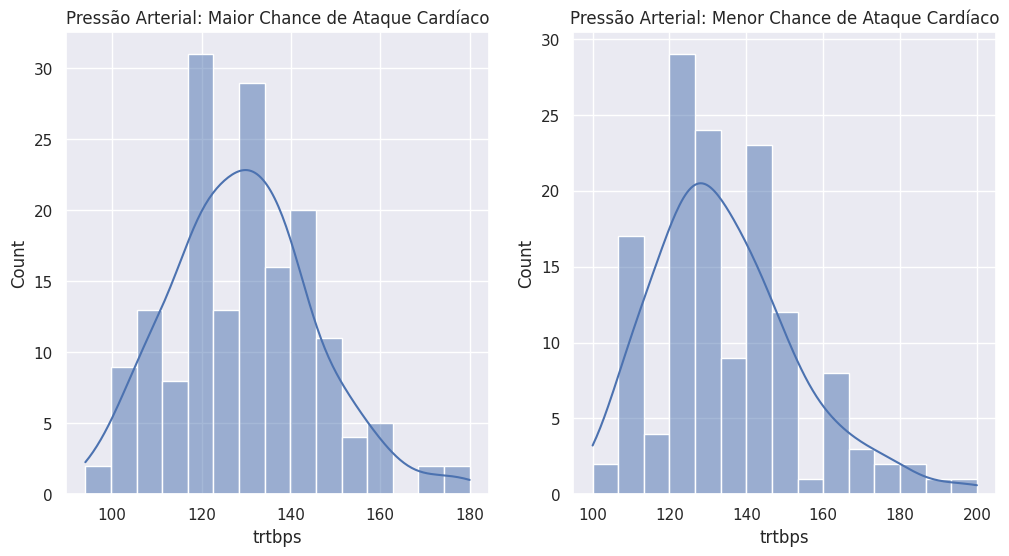

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Pressão Arterial: Maior Chance de Ataque Cardíaco")
sns.histplot(data=dados[dados['output']==1], x="trtbps",kde = True, bins=15)

plt.subplot(1,2,2)
plt.title("Pressão Arterial: Menor Chance de Ataque Cardíaco")
sns.histplot(data=dados[dados['output']==0], x="trtbps",kde = True, bins=15);


In [ ]:
# Analise Pressão Arterial: Menor Chance de Ataque Cardíaco
dados[dados['output']==0].trtbps.describe()

count    138.000000
mean     134.398551
std       18.729944
min      100.000000
25%      120.000000
50%      130.000000
75%      144.750000
max      200.000000
Name: trtbps, dtype: float64

In [ ]:
# Pressão Arterial: Maior Chance de Ataque Cardíaco
dados[dados['output']==1].trtbps.describe()

count    165.000000
mean     129.303030
std       16.169613
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: trtbps, dtype: float64

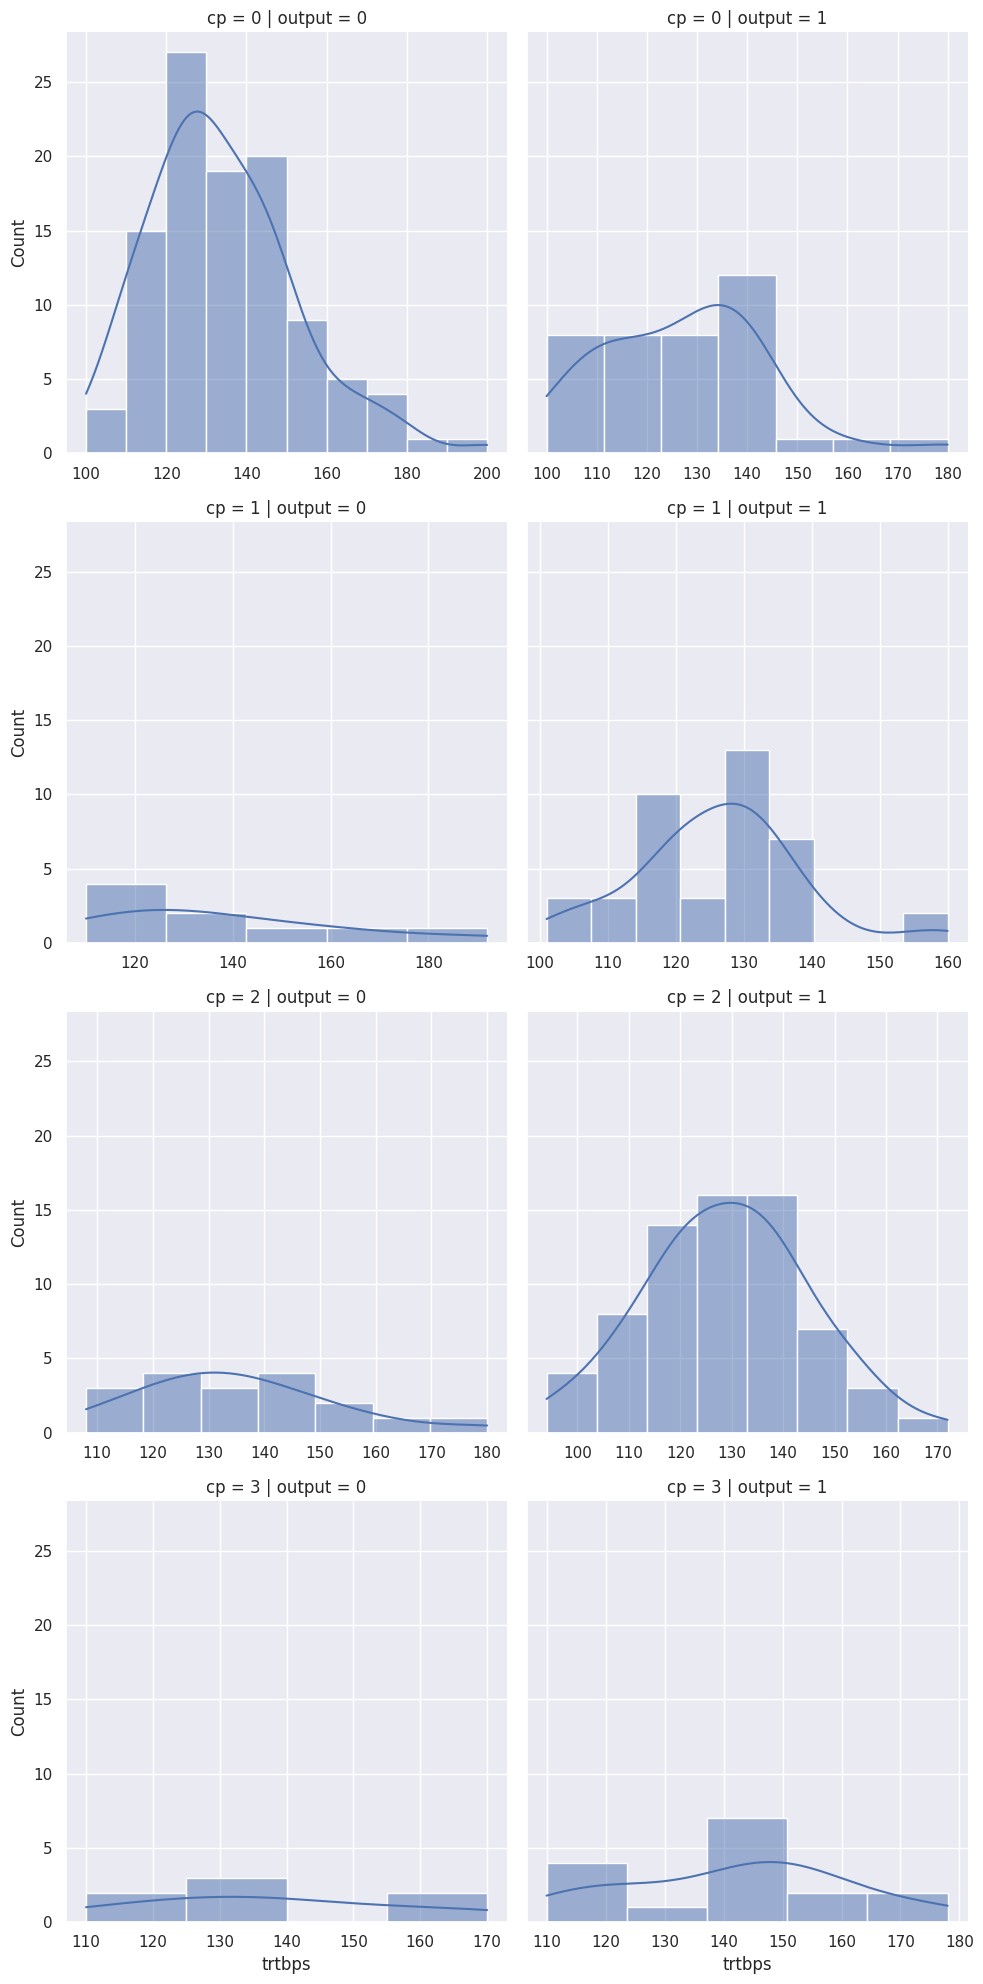

In [ ]:
g = sns.FacetGrid(dados, row="cp", col='output', sharex=False ,height=5)
g.map(sns.histplot,"trtbps", kde=True);

# Separando os dados em treino e Teste

In [ ]:
# Separando Valor Predito de valores Preditores
array=dados.values
x=array[:,0:13]
y=array[:,13]

# Guardando o nome das colunas das variveis preditoras
v = dados.columns
var = v.drop('output')

In [ ]:
# Separa os grupos em relação a chance de ataque cardíaco
ataque_pos=[]
ataque_neg=[]

In [ ]:
# enumerate passa o indice e valor
for i, ys in enumerate(y):
    if ys == 0:
        ataque_neg.append(x[i,:])
    if ys == 1:
        ataque_pos.append(x[i,:])

In [ ]:
df_pos = pd.DataFrame(data = ataque_pos,columns = var)
df_neg = pd.DataFrame(data =ataque_neg, columns = var)

In [ ]:
print('Paciente com mais chance de ter ataque cardíaco')
df_pos.describe().round(2)

Paciente com mais chance de ter ataque cardíaco


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00
mean,52.50,0.56,1.38,129.30,242.23,0.14,0.59,158.47,0.14,0.58,1.59,0.36,2.12
std,9.55,0.50,0.95,16.17,53.55,0.35,0.50,19.17,0.35,0.78,0.59,0.85,0.47
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,96.00,0.00,0.00,0.00,0.00,0.00
25%,44.00,0.00,1.00,120.00,208.00,0.00,0.00,149.00,0.00,0.00,1.00,0.00,2.00
50%,52.00,1.00,2.00,130.00,234.00,0.00,1.00,161.00,0.00,0.20,2.00,0.00,2.00
75%,59.00,1.00,2.00,140.00,267.00,0.00,1.00,172.00,0.00,1.00,2.00,0.00,2.00
max,76.00,1.00,3.00,180.00,564.00,1.00,2.00,202.00,1.00,4.20,2.00,4.00,3.00


In [ ]:
print('Paciente com menos chance de ter ataque cardíaco')
df_neg.describe().round(2)

Paciente com menos chance de ter ataque cardíaco


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,138.00,138.00,138.00,138.00,138.00,138.00,138.00,138.0,138.00,138.00,138.00,138.00,138.00
mean,56.60,0.83,0.48,134.40,251.09,0.16,0.45,139.1,0.55,1.59,1.17,1.17,2.54
std,7.96,0.38,0.91,18.73,49.45,0.37,0.54,22.6,0.50,1.30,0.56,1.04,0.68
min,35.00,0.00,0.00,100.00,131.00,0.00,0.00,71.0,0.00,0.00,0.00,0.00,0.00
25%,52.00,1.00,0.00,120.00,217.25,0.00,0.00,125.0,0.00,0.60,1.00,0.00,2.00
50%,58.00,1.00,0.00,130.00,249.00,0.00,0.00,142.0,1.00,1.40,1.00,1.00,3.00
75%,62.00,1.00,0.00,144.75,283.00,0.00,1.00,156.0,1.00,2.50,1.75,2.00,3.00
max,77.00,1.00,3.00,200.00,409.00,1.00,2.00,195.0,1.00,6.20,2.00,4.00,3.00


# Padronização

In [ ]:
x = dados.iloc[:, 0:13].values
y = dados.iloc[:, 13].values

In [ ]:
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.preprocessing import StandardScaler
X_esc2 = StandardScaler().fit_transform(x)

In [ ]:
X_esc2, X_esc2.dtype

(array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
         -0.71442887, -2.14887271],
        [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
         -0.71442887, -0.51292188],
        [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
         -0.71442887, -0.51292188],
        ...,
        [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
          1.24459328,  1.12302895],
        [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
          0.26508221,  1.12302895],
        [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
          0.26508221, -0.51292188]]),
 dtype('float64'))

# Separação do Daddos em Teste e Treino

In [ ]:
# Separando os dados em treino e teste
x_treino, x_teste ,y_treino ,y_teste = train_test_split(X_esc2,y,test_size=0.33, random_state=0)

In [ ]:
x_treino.shape, x_teste.shape ,y_treino.shape ,y_teste.shape

((203, 13), (100, 13), (203,), (100,))

# Criação e Treinamento dos Modelos

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_treino,y_treino)

KNeighborsClassifier()

In [ ]:
predicoes_knn = knn.predict(x_teste)

In [ ]:
print(classification_report(y_teste,predicoes_knn))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        48
           1       0.81      0.90      0.85        52

    accuracy                           0.84       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



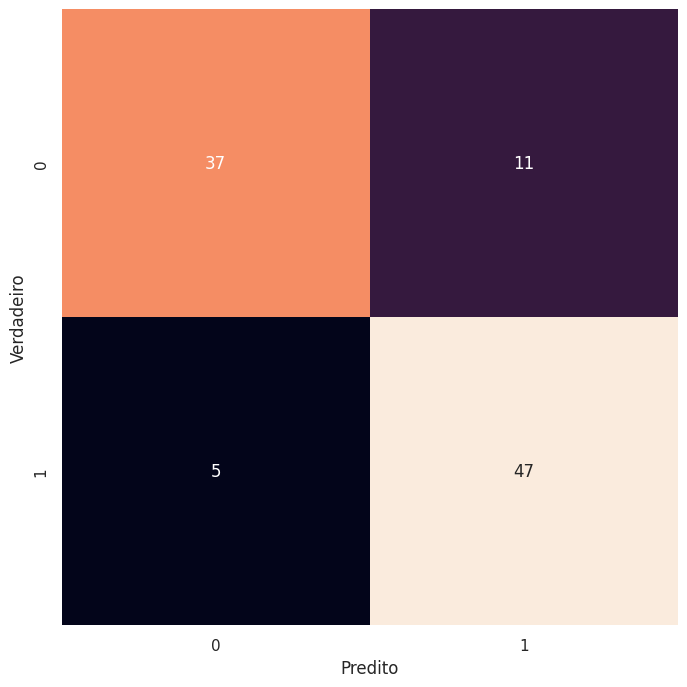

In [ ]:
nomes = np.unique(predicoes_knn)
matriz_knn = confusion_matrix(y_teste, predicoes_knn)
plt.figure(figsize=(12,8))
sns.heatmap(matriz_knn , square=True, annot=True, fmt='d', cbar=False,
xticklabels=nomes, yticklabels=nomes)
plt.xlabel('Predito');
plt.ylabel('Verdadeiro');

## Naive Bayes

In [ ]:
# Criando e treinando o modelo
clf = GaussianNB()
clf.fit(x_treino,y_treino)

GaussianNB()

In [ ]:
# fazendo predições
y_predict=clf.predict(x_teste)

In [ ]:
# Calculando acurácia e precisão do modelo
acc = accuracy_score(y_teste,y_predict)
pre=precision_score(y_teste, y_predict)
print('Acurácia do moldelo: ',acc)
print('Precisão do Modelo: ', pre)

Acurácia do moldelo:  0.81
Precisão do Modelo:  0.7894736842105263


In [ ]:
print(classification_report(y_teste,y_predict ))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        48
           1       0.79      0.87      0.83        52

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



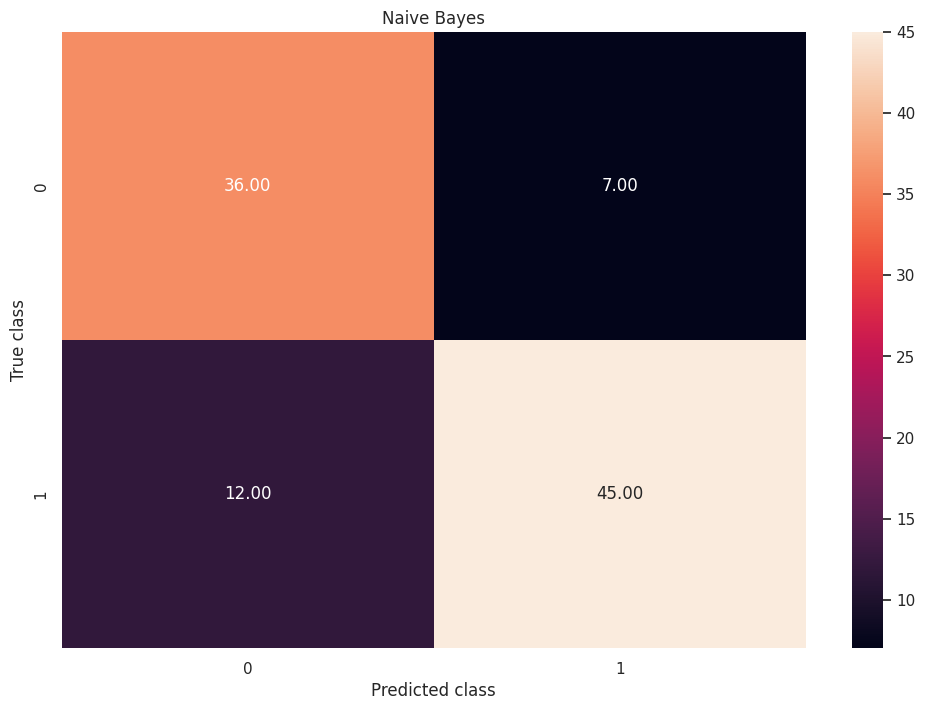

In [ ]:
plt.figure(figsize=(12,8))
forest_cm = confusion_matrix(y_predict,y_teste)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Naive Bayes');

## Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore_std = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_std.fit(x_treino,y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
predicoes_arv = arvore_std.predict(x_teste)

In [ ]:
print(classification_report(y_teste,predicoes_arv ))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        48
           1       0.77      0.79      0.78        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



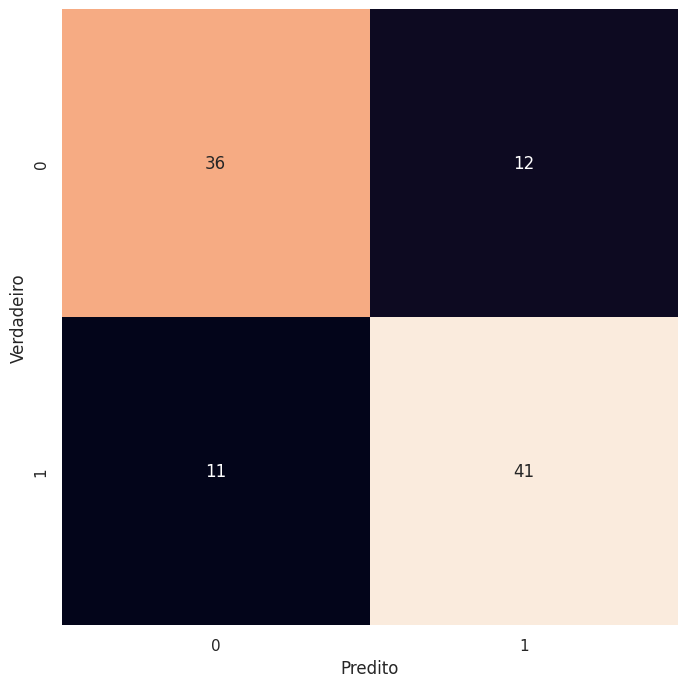

In [ ]:
nomes = np.unique(predicoes_arv)
matriz_arv = confusion_matrix(y_teste, predicoes_arv)
plt.figure(figsize=(12,8))
sns.heatmap(matriz_arv , square=True, annot=True, fmt='d', cbar=False,
xticklabels=nomes, yticklabels=nomes)
plt.xlabel('Predito');
plt.ylabel('Verdadeiro');

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_random_forest = RandomForestClassifier(random_state=10)
modelo_random_forest.fit(x_treino,y_treino)

RandomForestClassifier(random_state=10)

In [ ]:
predicoes_random_forest = modelo_random_forest.predict(x_teste)

In [ ]:
print(classification_report(y_teste,predicoes_random_forest ))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        48
           1       0.80      0.90      0.85        52

    accuracy                           0.83       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100



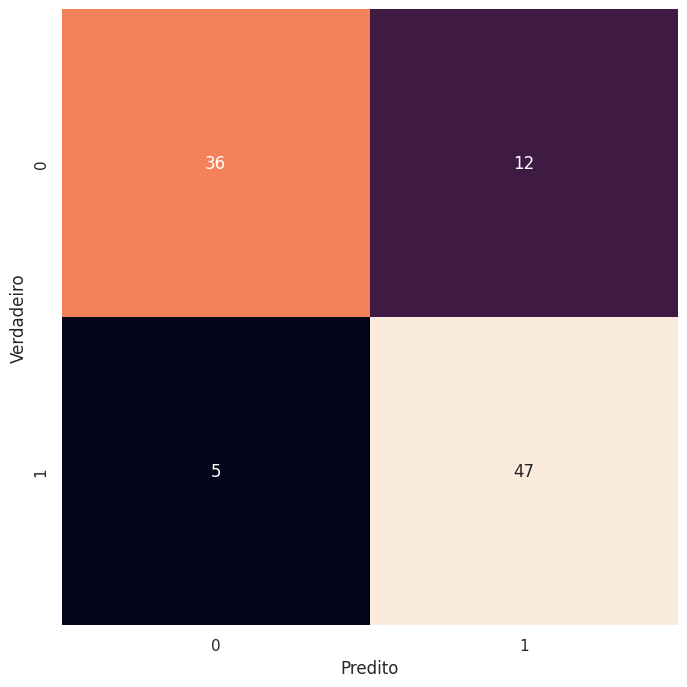

In [ ]:
nomes = np.unique(predicoes_random_forest)
matriz_random_forest = confusion_matrix(y_teste, predicoes_random_forest)
plt.figure(figsize=(12,8))
sns.heatmap(matriz_random_forest , square=True, annot=True, fmt='d', cbar=False,
xticklabels=nomes, yticklabels=nomes)
plt.xlabel('Predito');
plt.ylabel('Verdadeiro');

## XGBoosting

In [ ]:
from xgboost import XGBClassifier


In [ ]:
modelo_xgboost = XGBClassifier(random_state=10)
modelo_xgboost.fit(x_treino,y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

In [ ]:
predicoes_xgboost = modelo_xgboost.predict(x_teste)

In [ ]:
print(classification_report(y_teste,predicoes_xgboost))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        48
           1       0.81      0.85      0.83        52

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



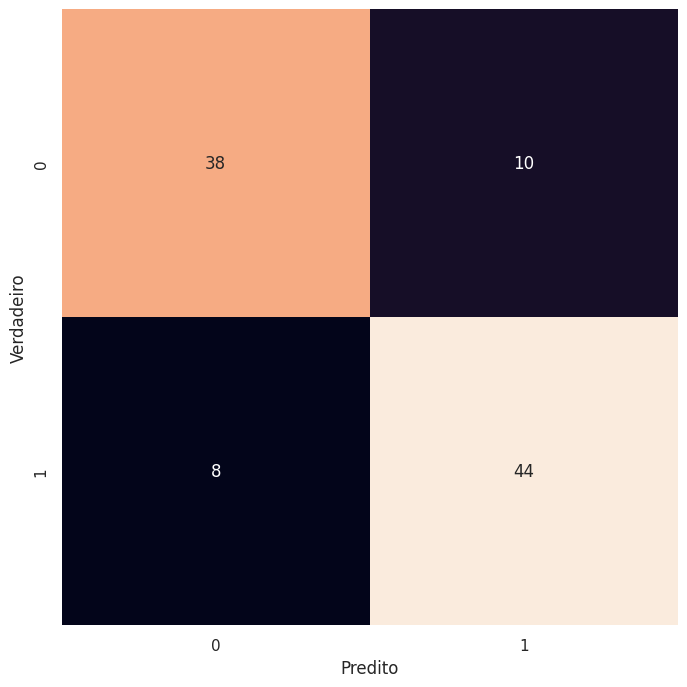

In [ ]:
nomes = np.unique(predicoes_xgboost)
matriz = confusion_matrix(y_teste, predicoes_xgboost)
plt.figure(figsize=(12,8))
sns.heatmap(matriz, square=True, annot=True, fmt='d', cbar=False,
xticklabels=nomes, yticklabels=nomes)
plt.xlabel('Predito');
plt.ylabel('Verdadeiro');

## SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(random_state= 10)
svm.fit(x_treino,y_treino)

SVC(random_state=10)

In [ ]:
predicoes_svm = svm.predict(x_teste)

In [ ]:
print(classification_report(y_teste,predicoes_svm))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        48
           1       0.78      0.90      0.84        52

    accuracy                           0.82       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.82      0.82       100



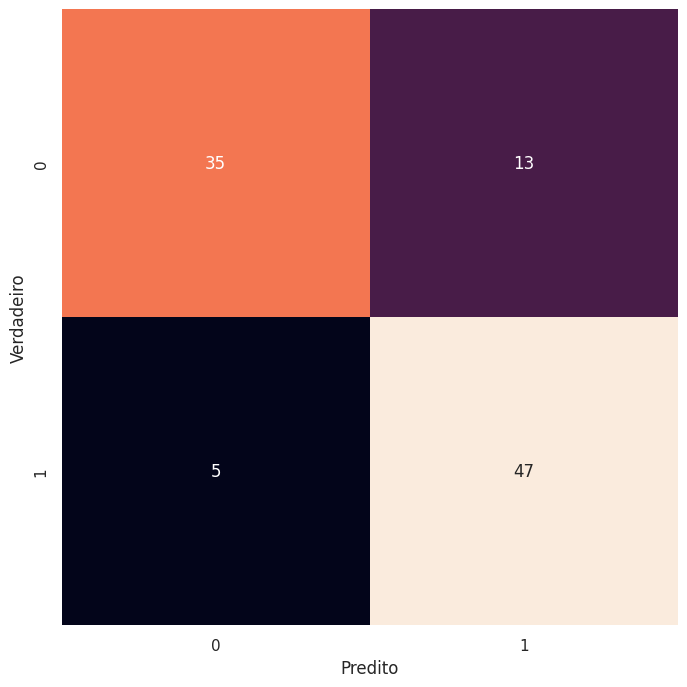

In [ ]:
nomes = np.unique(predicoes_svm)
matriz_svm = confusion_matrix(y_teste, predicoes_svm)
plt.figure(figsize=(12,8))
sns.heatmap(matriz_svm , square=True, annot=True, fmt='d', cbar=False,
xticklabels=nomes, yticklabels=nomes)
plt.xlabel('Predito');
plt.ylabel('Verdadeiro');

# Tunning

In [ ]:
#Concatenando treino e teste
x_total = np.concatenate((x_treino, x_teste))
y_total = np.concatenate((y_treino ,y_teste))

In [ ]:
from sklearn.model_selection import GridSearchCV #Importando GridSearch para tunning de hiperparâmetros

## KNN

In [ ]:
parametros = {
    'weights' : ['uniform', 'distance'],                          #-> Peso atribuido as distâncias. 'uniform' = Mesmo peso para todos os vizinhos | 'Distance' = peso maior para vizinhos próximos
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],      #-> Algoritmo usado para calcular os vizinhos mais próximos
    'n_neighbors': [1, 3, 5, 10, 20, 25, 30, 35],                 #-> Número de vizinhos a serem usados
    'p': [1, 2],                                                  #-> 1 para distância de Manhattan | 2 para distância Euclidiana
}

In [ ]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_total, y_total)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 10, 20, 25, 30, 35],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [ ]:
melhores_h_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [ ]:
melhores_h_parametros

{'algorithm': 'auto', 'n_neighbors': 30, 'p': 1, 'weights': 'uniform'}

In [ ]:
melhor_resultado

0.8348633879781422

## Árvore de Decisão

In [ ]:
#Criando dicionário para passar os parâmetros a serem testados
parametros = {
    'criterion': ['gini', 'entropy'],        #-> Com base no critério escolhido, o modelo definirá a importância de cada caractrística para a classificação.
    'splitter': ['best', 'random'],          #-> Relacionado com 'criterion', o modelo toma o recurso de maior importância ou aleatoriamente
    'min_samples_split': [2, 5, 10, 15],     #-> Define o número mínimo de amostras (ou observações) que são necessárias para considerar dividir um nó.
    'min_samples_leaf': [1, 5, 10, 15],      #-> Número mínimo de amostras em cada folha.
    'random_state': [10],                    #-> Aleatorierade do estimador, definindo um número inteiro, obtemos um comportamento determinístico. Também conhecido como "semente"
    'max_depth': [3, 5, 7, 9, 15, 20,]       #-> Profundidade máxima da folha
}

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_total, y_total)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 15, 20],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15],
                         'random_state': [10], 'splitter': ['best', 'random']})

In [ ]:
melhores_h_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [ ]:
melhores_h_parametros

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 10,
 'splitter': 'random'}

In [ ]:
melhor_resultado

0.8347540983606558

## Random Forest

In [ ]:
parametros = {
'n_estimators': [100,1000],               #-> Número de estimadores
'min_samples_leaf': [1, 5, 10,14,20],     #-> Número mínimo de amostras em cada folha
'min_samples_split': [2, 5, 10, 14,20],   #-> Número mínimo de amostras exigido para separar um nó.
'max_features': ["auto", "sqrt", "log2"], #-> Número de atributos para analisar na separação. O default são todos.
'random_state': [10],                     
'bootstrap':[True, False]                 #-> 
}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_total, y_total)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 14, 20],
                         'min_samples_split': [2, 5, 10, 14, 20],
                         'n_estimators': [100, 1000], 'random_state': [10]})

In [ ]:
melhores_h_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [ ]:
melhores_h_parametros

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 14,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 10}

In [ ]:
melhor_resultado

0.8481420765027323

## XGBoosting

In [ ]:
parametros_xg = {
'n_estimators': [100, 1000], #-> Número de estimadores
'learning_rate': [0.02, 0.035, 0.05, 0.07, 0.09, 0.1], #-> Taxa de aprendizagem
'max_depth': [1,3,5,7,9,15,20], #-> Comprimento da árvore vertical
'min_child_weight': [1, 5, 10,14,20], #-> Quantidade de amostras no último nó
'subsample': [0.3,0.5,0.7,0.9,1], #->  Fração das amostras a serem usadas na próxima rodada.
'random_state': [10]
}


In [ ]:
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=parametros_xg)
grid_search.fit(x_total, y_total)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.02, 0.035, 0.05, 0.07, 0.09, 0.1],
                         'max_depth': [1, 3, 5, 7, 9, 15, 20],
                         'min_child_weight': [1, 5, 10, 14, 20],
                         'n_estimators': [100, 1000], 'random_state': [10],
                         'subsample': [0.3, 0.5, 0.7, 0.9, 1]})

In [ ]:
melhores_h_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [ ]:
melhores_h_parametros

{'learning_rate': 0.1,
 'max_depth': 1,
 'min_child_weight': 1,
 'n_estimators': 100,
 'random_state': 10,
 'subsample': 0.5}

In [ ]:
melhor_resultado

0.8678688524590165

## SVM

In [ ]:
param_grid_svm = {'C': [0.1,1, 10, 100], #-> Parâmetro de penalidade
                  'gamma': [1,0.1,0.01,0.001], #-> Coeficiente do Kernel
                  'kernel': ['rbf', 'poly', 'sigmoid'],
                  'random_state': [10]}

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid = param_grid_svm)
grid_final = grid_search.fit(x_total, y_total)

In [ ]:
melhores_h_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [ ]:
melhores_h_parametros

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf', 'random_state': 10}

In [ ]:
melhor_resultado

0.8546994535519126

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
dt = DecisionTreeClassifier(criterion = 'gini',
 max_depth= 3,
 min_samples_leaf= 1,
 min_samples_split= 2,
 random_state= 10,
 splitter= 'random')

In [ ]:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors= 30, p= 1, weights= 'uniform')

In [ ]:
rf = RandomForestClassifier(bootstrap= True,
 max_features= 'auto',
 min_samples_leaf= 14,
 min_samples_split= 2,
 n_estimators= 100,
 random_state= 10)

In [ ]:
svm = SVC(C= 100, gamma= 0.001, kernel= 'rbf', random_state= 10)

In [ ]:
xg = XGBClassifier(learning_rate= 0.1,
 max_depth= 1,
 min_child_weight= 1,
 n_estimators= 100,
 random_state= 10,
 subsample= 0.5)

In [ ]:
resultados_DT = []
resultados_RF = []
resultados_KNN = []
resultados_SVM = []
resultados_NB = []
resultados_XG = []

In [ ]:
nb = GaussianNB()

In [ ]:
for i in range(30):
  particoes = KFold(n_splits=10, shuffle=True, random_state=i)

  scores = cross_val_score(nb,  x_total, y_total, cv = particoes)
  resultados_NB.append(scores.mean())

  scores = cross_val_score(dt, x_total, y_total, cv = particoes)
  resultados_DT.append(scores.mean())

  scores = cross_val_score(knn, x_total, y_total, cv = particoes)
  resultados_KNN.append(scores.mean())
  
  scores = cross_val_score(rf, x_total, y_total, cv = particoes)
  resultados_RF.append(scores.mean())
  
  scores = cross_val_score(svm, x_total, y_total, cv = particoes)
  resultados_SVM.append(scores.mean())

  scores = cross_val_score(xg, x_total, y_total, cv = particoes)
  resultados_XG.append(scores.mean())

In [ ]:
resultadosf1_DT = []
resultadosf1_RF = []
resultadosf1_KNN = []
resultadosf1_SVM = []
resultadosf1_NB = []
resultadosf1_XG = []

In [ ]:
for i in range(30):
  particoesf1 = KFold(n_splits=10, shuffle=True, random_state=i)

  scores = cross_val_score(nb, x_total, y_total, cv = particoesf1, scoring = 'f1')
  resultadosf1_NB.append(scores.mean())

In [ ]:
for i in range(30):
  particoesf1 = KFold(n_splits=10, shuffle=True, random_state=i)

  scores = cross_val_score(dt, x_total, y_total, cv = particoesf1, scoring = 'f1')
  resultadosf1_DT.append(scores.mean())

In [ ]:
for i in range(30):
  particoesf1 = KFold(n_splits=10, shuffle=True, random_state=i)

  scores = cross_val_score(knn, x_total, y_total, cv = particoesf1, scoring = 'f1')
  resultadosf1_KNN.append(scores.mean())

In [ ]:
for i in range(30):
  particoesf1 = KFold(n_splits=10, shuffle=True, random_state=i)

  scores = cross_val_score(rf, x_total, y_total, cv = particoesf1, scoring = 'f1')
  resultadosf1_RF.append(scores.mean())

In [ ]:
for i in range(30):
  particoesf1 = KFold(n_splits=10, shuffle=True, random_state=i)

  scores = cross_val_score(svm, x_total, y_total, cv = particoesf1, scoring = 'f1')
  resultadosf1_SVM.append(scores.mean())

In [ ]:
for i in range(30):
  particoesf1 = KFold(n_splits=10, shuffle=True, random_state=i)
 
  scores = cross_val_score(xg, x_total, y_total, cv = particoesf1, scoring = 'f1')
  resultadosf1_XG.append(scores.mean())

In [ ]:
resultados_NB

[0.8111827956989247,
 0.8248387096774193,
 0.8279569892473118,
 0.8090322580645161,
 0.8218279569892474,
 0.8179569892473119,
 0.8221505376344087,
 0.8258064516129032,
 0.8180645161290322,
 0.814731182795699,
 0.8119354838709677,
 0.8116129032258066,
 0.8118279569892474,
 0.8154838709677421,
 0.8217204301075268,
 0.8111827956989247,
 0.8184946236559141,
 0.8181720430107526,
 0.8184946236559141,
 0.8186021505376344,
 0.8148387096774193,
 0.8118279569892473,
 0.8221505376344087,
 0.8013978494623656,
 0.8120430107526883,
 0.8220430107526882,
 0.8282795698924732,
 0.8050537634408602,
 0.8213978494623657,
 0.8283870967741935]

In [ ]:
resultadosf1_NB

[0.8271949031652062,
 0.8364417104710242,
 0.8443465286114842,
 0.822194929684802,
 0.837342050204424,
 0.8311437170663926,
 0.8356507017419549,
 0.836327695474037,
 0.8342880857967065,
 0.8293563625285835,
 0.8290991833396406,
 0.8093625481631479,
 0.8279664506135095,
 0.8327851231605624,
 0.8376715346327692,
 0.8190336490923957,
 0.8302938159834712,
 0.8281217466537617,
 0.834448355250063,
 0.8339256644302283,
 0.8233697750837543,
 0.8247915945492492,
 0.8379093522180765,
 0.8193174934977918,
 0.8305757886403047,
 0.8340046048869579,
 0.8378021628978832,
 0.8179294879294879,
 0.8353014120159026,
 0.8390760325922454]

In [ ]:
resultados_DT

[0.8178494623655915,
 0.8047311827956989,
 0.8343010752688172,
 0.8383870967741934,
 0.815268817204301,
 0.798494623655914,
 0.8253763440860216,
 0.8154838709677419,
 0.8083870967741935,
 0.8281720430107526,
 0.7887096774193549,
 0.8280645161290323,
 0.7983870967741936,
 0.7949462365591399,
 0.821505376344086,
 0.8143010752688171,
 0.8120430107526883,
 0.8081720430107527,
 0.8187096774193549,
 0.831505376344086,
 0.8118279569892473,
 0.8221505376344087,
 0.8290322580645162,
 0.8184946236559141,
 0.795483870967742,
 0.8187096774193549,
 0.8251612903225807,
 0.7860215053763442,
 0.8212903225806452,
 0.8249462365591397]

In [ ]:
resultadosf1_DT

[0.8394841588207529,
 0.827595158897466,
 0.8468005179045652,
 0.8562915033620209,
 0.8430264547177255,
 0.8224552030351584,
 0.8424663721529371,
 0.8334735710676131,
 0.8300842950630184,
 0.8456288430026019,
 0.8133128357443773,
 0.8367601166760515,
 0.8205136370418777,
 0.8253878503536448,
 0.8344758753379443,
 0.8317752310139117,
 0.82628896430367,
 0.8214574648267219,
 0.845005024851576,
 0.8544660764607832,
 0.8181852625135679,
 0.8393367767104735,
 0.8496230632835184,
 0.8393177868848773,
 0.8188972482393535,
 0.840592853092853,
 0.8402445298026503,
 0.815230108833951,
 0.8429825106955603,
 0.8397212369884659]

In [ ]:
resultados_KNN

[0.814731182795699,
 0.8282795698924732,
 0.8181720430107526,
 0.8286021505376345,
 0.8152688172043012,
 0.8413978494623657,
 0.8186021505376344,
 0.8223655913978494,
 0.8413978494623656,
 0.8344086021505376,
 0.8417204301075267,
 0.8382795698924731,
 0.8289247311827956,
 0.8249462365591397,
 0.8318279569892475,
 0.8279569892473118,
 0.825483870967742,
 0.8245161290322581,
 0.8416129032258066,
 0.8152688172043012,
 0.8186021505376345,
 0.8447311827956989,
 0.8356989247311828,
 0.8378494623655914,
 0.8381720430107527,
 0.8448387096774193,
 0.8381720430107527,
 0.8411827956989247,
 0.8249462365591398,
 0.8286021505376345]

In [ ]:
resultadosf1_KNN

[0.8368996222959637,
 0.8442031718302134,
 0.840436042546399,
 0.8469439516126023,
 0.8385728145334002,
 0.8606450484911117,
 0.8398138536820445,
 0.8406014074944466,
 0.863047444242236,
 0.8545331019170028,
 0.8612821711521967,
 0.8505787144496821,
 0.8523265680086812,
 0.8493381440628361,
 0.8525863935808031,
 0.8474532759565966,
 0.847350864238736,
 0.8355289887087796,
 0.8623436893582033,
 0.8354523279926506,
 0.8325233698707206,
 0.8590148318733333,
 0.85204856707703,
 0.8559364554930688,
 0.8599152819176605,
 0.8603918040368693,
 0.8562706447382313,
 0.8579561614855733,
 0.8467641385661407,
 0.8465529836377247]

In [ ]:
resultados =pd.DataFrame({'DT':(resultados_DT), 'RF':(resultados_RF), 'KNN':(resultados_KNN),
'SVM':(resultados_SVM), 'NB':(resultados_NB)  , 'XG':(resultados_XG)})

In [ ]:
resultados

,DT,RF,KNN,SVM,NB,XG
0,0.817849,0.831398,0.814731,0.821398,0.811183,0.838172
1,0.804731,0.831290,0.828280,0.827849,0.824839,0.837957
2,0.834301,0.824731,0.818172,0.834624,0.827957,0.840968
3,0.838387,0.841828,0.828602,0.835269,0.809032,0.851935
4,0.815269,0.831290,0.815269,0.834946,0.821828,0.844731
5,0.798495,0.821505,0.841398,0.847849,0.817957,0.841398
6,0.825376,0.825484,0.818602,0.841613,0.822151,0.831828
7,0.815484,0.825161,0.822366,0.829140,0.825806,0.831935
8,0.808387,0.827957,0.841398,0.844194,0.818065,0.837742
9,0.828172,0.824409,0.834409,0.834516,0.814731,0.831183


In [ ]:
resultados.describe()

,DT,RF,KNN,SVM,NB,XG
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.815197,0.831154,0.830552,0.838391,0.817283,0.837724
std,0.013519,0.007545,0.009547,0.007319,0.006771,0.006780
min,0.786022,0.818602,0.814731,0.821398,0.801398,0.827957
25%,0.808226,0.825242,0.824624,0.834543,0.811855,0.831667
50%,0.818172,0.831290,0.828763,0.838710,0.818118,0.838065
75%,0.825108,0.837151,0.838253,0.843629,0.821989,0.841398
max,0.838387,0.845376,0.844839,0.851183,0.828387,0.851935


In [ ]:
#Coeficiente de Variação - CV / Mede a homogeniedade ou heterogeniedade do resultado dos testes
#For menor ou igual a 15% → baixa dispersão: dados homogêneos
#For entre 15 e 30% → média dispersão
#For maior que 30% → alta dispersão: dados heterogêneos

(resultados.std() / resultados.mean()) * 100

DT     1.658404
RF     0.907828
KNN    1.149442
SVM    0.872942
NB     0.828489
XG     0.809363
dtype: float64

In [ ]:
F1 = pd.DataFrame({'DT':(resultadosf1_DT), 'RF':(resultadosf1_RF), 'KNN':(resultadosf1_KNN),
'SVM':(resultadosf1_SVM), 'NB':(resultadosf1_NB) ,  'XG':(resultadosf1_XG)})

In [ ]:
F1

,DT,RF,KNN,SVM,NB,XG
0,0.839484,0.847662,0.836900,0.841776,0.827195,0.852798
1,0.827595,0.850001,0.844203,0.848915,0.836442,0.850675
2,0.846801,0.847447,0.840436,0.858988,0.844347,0.862124
3,0.856292,0.852435,0.846944,0.847149,0.822195,0.861945
4,0.843026,0.851680,0.838573,0.856900,0.837342,0.860877
5,0.822455,0.839506,0.860645,0.865549,0.831144,0.855523
6,0.842466,0.841362,0.839814,0.861678,0.835651,0.844976
7,0.833474,0.843977,0.840601,0.848878,0.836328,0.848752
8,0.830084,0.850851,0.863047,0.862465,0.834288,0.848793
9,0.845629,0.844563,0.854533,0.856611,0.829356,0.849423


In [ ]:
F1.describe()

,DT,RF,KNN,SVM,NB,XG
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.834696,0.848925,0.849577,0.857579,0.830569,0.851753
std,0.011649,0.006920,0.009120,0.007202,0.007634,0.007908
min,0.813313,0.836839,0.832523,0.841776,0.809363,0.832855
25%,0.825613,0.844123,0.841502,0.851189,0.827388,0.847631
50%,0.838039,0.848507,0.849958,0.860114,0.831964,0.852552
75%,0.842853,0.854325,0.857535,0.862427,0.836158,0.856017
max,0.856292,0.863113,0.863047,0.869115,0.844347,0.865615


In [ ]:
#Coeficiente de Variação - CV para F1
(F1.std() / F1.mean()) * 100

DT     1.395617
RF     0.815119
KNN    1.073447
SVM    0.839848
NB     0.919137
XG     0.928448
dtype: float64

# Teste de Shapiro

Teste de normalidade. Se a hipotese for nula é porque a distribuição é normal. Se o p-value for pequeno eu rejeito a hipótese nula e não é normal, se o p-value for alto (p-value > nível de significância) eu não rejeito a hipótese nula. Utilizaremos nível de significância 0.05.

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(resultados_DT), shapiro(resultados_RF), shapiro(resultados_KNN), shapiro(resultados_SVM), shapiro(resultados_NB), shapiro(resultados_XG),

(ShapiroResult(statistic=0.9600405693054199, pvalue=0.31051579117774963),
 ShapiroResult(statistic=0.9680485129356384, pvalue=0.48725393414497375),
 ShapiroResult(statistic=0.932906448841095, pvalue=0.05868275463581085),
 ShapiroResult(statistic=0.9717642068862915, pvalue=0.588495135307312),
 ShapiroResult(statistic=0.9663152694702148, pvalue=0.4438628852367401),
 ShapiroResult(statistic=0.9372693300247192, pvalue=0.07680418342351913))

Todos os modelos apresentam distribuição normal

In [ ]:
shapiro(resultadosf1_DT), shapiro(resultadosf1_RF), shapiro(resultadosf1_KNN), shapiro(resultadosf1_SVM), shapiro(resultadosf1_NB), shapiro(resultadosf1_XG),

(ShapiroResult(statistic=0.9656819105148315, pvalue=0.42869362235069275),
 ShapiroResult(statistic=0.9799566864967346, pvalue=0.8244009017944336),
 ShapiroResult(statistic=0.9485189914703369, pvalue=0.15428128838539124),
 ShapiroResult(statistic=0.9280211329460144, pvalue=0.04351689666509628),
 ShapiroResult(statistic=0.9450203776359558, pvalue=0.12421056628227234),
 ShapiroResult(statistic=0.9720206260681152, pvalue=0.5958177447319031))

SVM não apresenta distribuição é normal

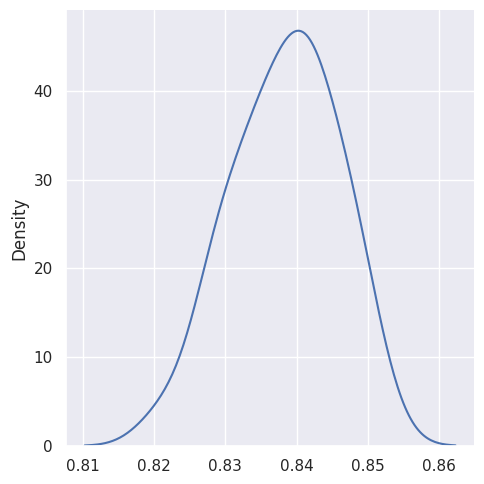

In [ ]:
sns.displot(resultados_SVM, kind = 'kde');

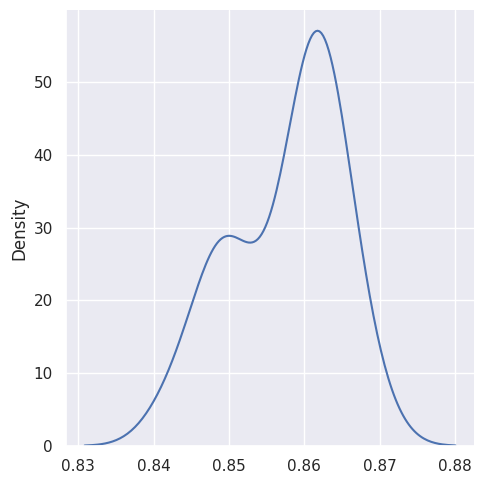

In [ ]:
sns.displot(resultadosf1_SVM, kind = 'kde');

In [ ]:
resultados_algoritmos_teste = {'accuracy': np.concatenate([resultados_DT, resultados_RF, resultados_KNN, resultados_SVM, resultados_NB, resultados_XG]),\
'algoritmo': ['DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'SVM', 'SVM', 'SVM', 'SVM', 'SVM',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'XG', 'XG', 'XG', 'XG', 'XG',\
'XG', 'XG', 'XG', 'XG', 'XG',\
'XG', 'XG', 'XG', 'XG', 'XG',\
'XG', 'XG', 'XG', 'XG', 'XG',\
'XG', 'XG', 'XG', 'XG', 'XG',\
'XG', 'XG', 'XG', 'XG', 'XG']}

In [ ]:
resultados_df = pd.DataFrame(resultados_algoritmos_teste)
resultados_df.head(200)

,accuracy,algoritmo
0,0.817849,DT
1,0.804731,DT
2,0.834301,DT
3,0.838387,DT
4,0.815269,DT
...,...,...
175,0.841505,XG
176,0.841398,XG
177,0.831505,XG
178,0.834839,XG


In [ ]:
resultados_algoritmosf1_teste = {'f1': np.concatenate([resultadosf1_DT, resultadosf1_RF, resultadosf1_KNN, resultadosf1_NB, resultadosf1_XG]),\
'algoritmo': ['DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'DT', 'DT', 'DT', 'DT', 'DT',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'RF', 'RF', 'RF', 'RF', 'RF',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'KNN', 'KNN', 'KNN', 'KNN', 'KNN',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'NB', 'NB', 'NB', 'NB', 'NB',\
'XG', 'XG', 'XG', 'XG', 'XG',\
'XG', 'XG', 'XG', 'XG', 'XG',\
'XG', 'XG', 'XG', 'XG', 'XG',\
'XG', 'XG', 'XG', 'XG', 'XG',\
'XG', 'XG', 'XG', 'XG', 'XG',\
'XG', 'XG', 'XG', 'XG', 'XG']}

In [ ]:
resultados_dff1 = pd.DataFrame(resultados_algoritmosf1_teste)
resultados_dff1.head(200)

,f1,algoritmo
0,0.839484,DT
1,0.827595,DT
2,0.846801,DT
3,0.856292,DT
4,0.843026,DT
...,...,...
145,0.858051,XG
146,0.853473,XG
147,0.847257,XG
148,0.854145,XG


# Teste Turkey

In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [ ]:
teste_estatistico = compara_algoritmos.tukeyhsd()

In [ ]:
print(teste_estatistico)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    DT    KNN   0.0154    0.0  0.0087   0.022   True
    DT     NB   0.0021 0.9443 -0.0045  0.0087  False
    DT     RF    0.016    0.0  0.0093  0.0226   True
    DT    SVM   0.0232    0.0  0.0166  0.0298   True
    DT     XG   0.0225    0.0  0.0159  0.0292   True
   KNN     NB  -0.0133    0.0 -0.0199 -0.0066   True
   KNN     RF   0.0006 0.9998  -0.006  0.0072  False
   KNN    SVM   0.0078 0.0104  0.0012  0.0145   True
   KNN     XG   0.0072 0.0256  0.0005  0.0138   True
    NB     RF   0.0139    0.0  0.0072  0.0205   True
    NB    SVM   0.0211    0.0  0.0145  0.0277   True
    NB     XG   0.0204    0.0  0.0138  0.0271   True
    RF    SVM   0.0072 0.0235  0.0006  0.0139   True
    RF     XG   0.0066 0.0536 -0.0001  0.0132  False
   SVM     XG  -0.0007 0.9997 -0.0073   0.006  False
----------------------------------------------

In [ ]:
resultados.mean()

DT     0.815197
RF     0.831154
KNN    0.830552
SVM    0.838391
NB     0.817283
XG     0.837724
dtype: float64

Com o gráfico a seguir, e sabendo-se que as diferenças são significativas, basta
olharmos o ponto mais adiante (o melhor agoritmo)

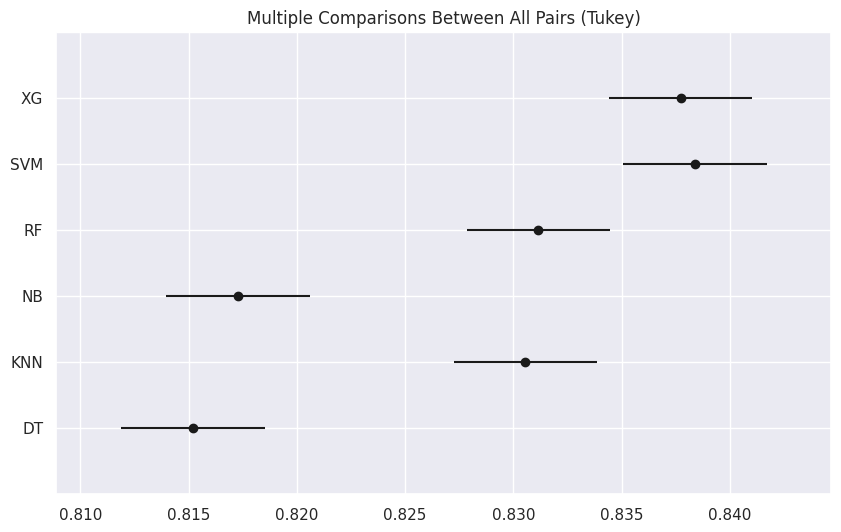

In [ ]:
teste_estatistico.plot_simultaneous();